# BF527: Applications in Bioinformatics

>**Note:** Please submit the Jupyter notebook through Blackboard. Your code should follow the guidelines laid out in class, including commenting. Partial credit will be given for nonfunctional code that is logical and well commented. This assignment must be completed on your own.

## Homework 8

### See [Blackboard](https://learn.bu.edu) for assignment and due dates

---

## Problem 8.1 (40%):

#### Go to the PDB website and open the page for the structure with PDB ID 3BMP.

* Use __Pfam__, Uniprot, Google or Wikipedia to find some information about this protein. How long is the protein? Which superfamily does the protein belong to? What is the protein’s function, and the evolutionary history of the superfamily? What domains and enzymatic properties does the protein have?

#### Explore the 3D structure of “3BMP” using the "3D View" tab on the PDB website.

* Generate two informative pictures of this structure by manipulating the various style options (you can fine tune these options through the right-click menu). Include screen shots with your homework submission and explain the biological meaning of the different styles.

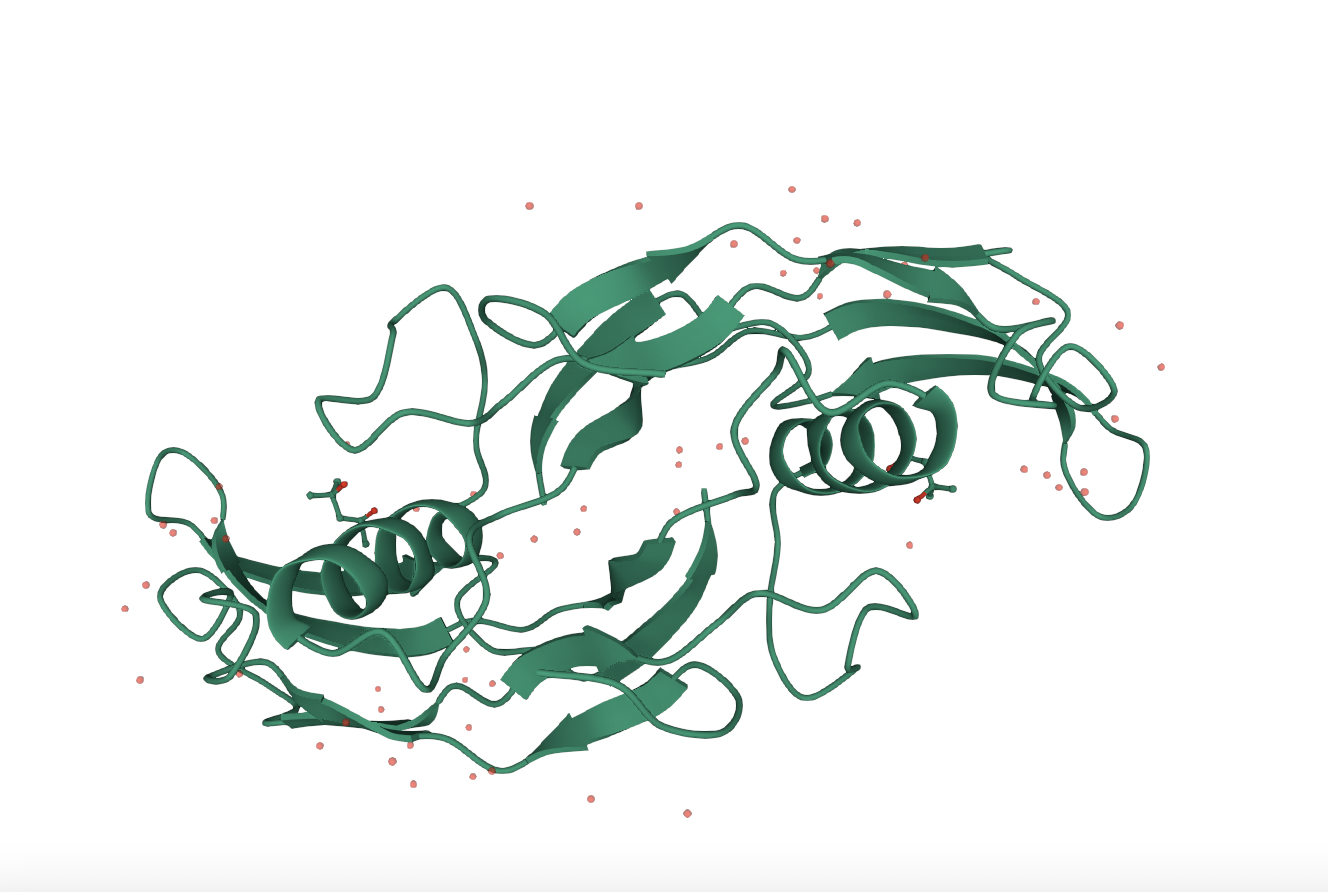

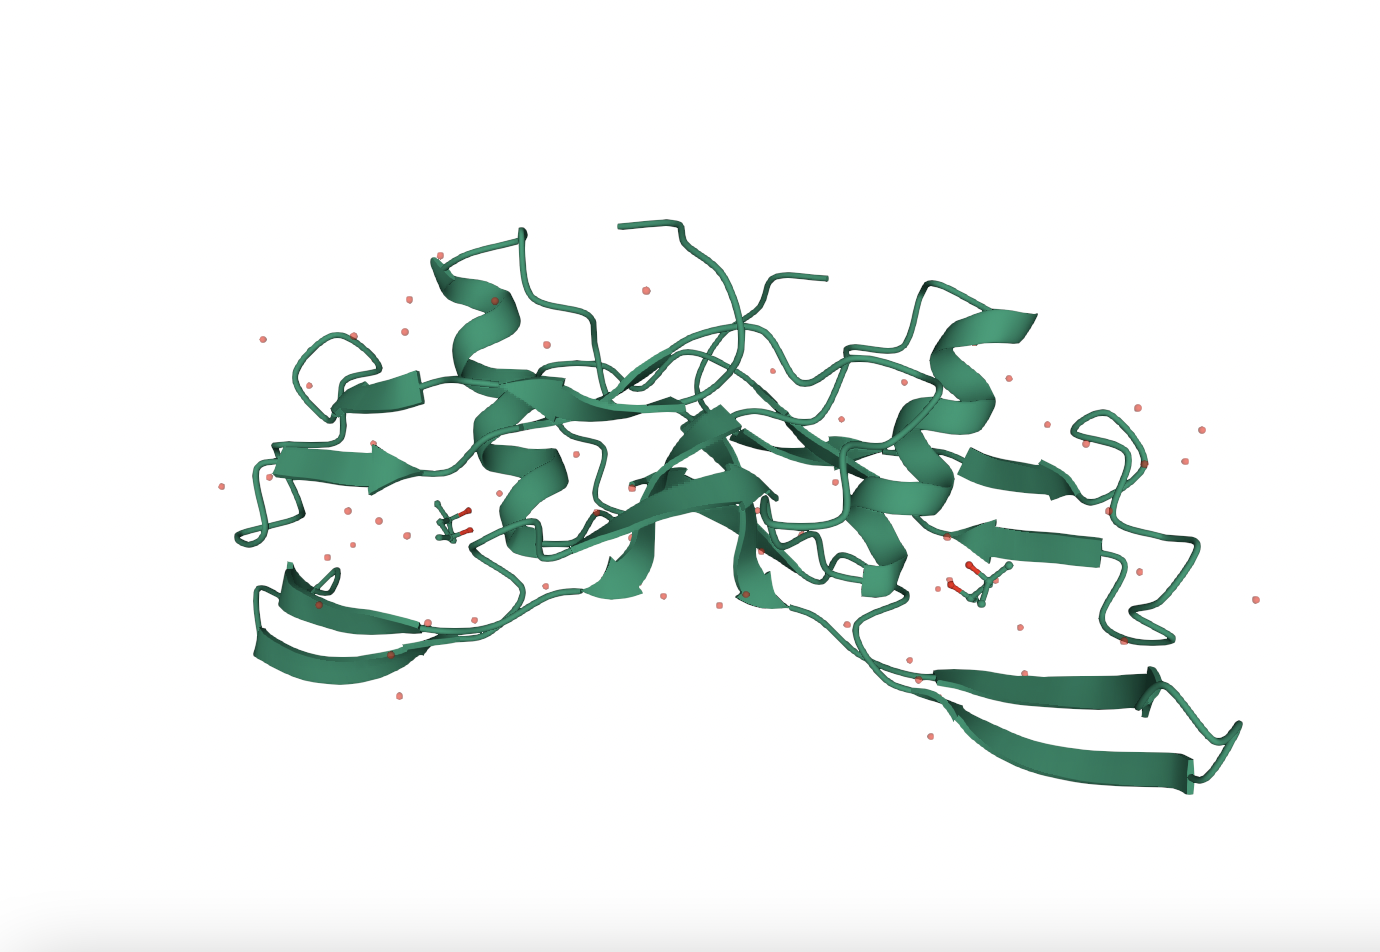

#### Use the other information tabs to answer the remaining questions.

* There are some “dots” buried in the structure—what do these represent? __Hint: try hovering over them with your pointer.__

* Describe the secondary structure composition of this protein. Is there a prevalence of one type of secondary structure?

* Does the protein belong to a family recognized by SCOP, CATH, and/or PFam?

* Is the protein similar to any other human proteins? To what degree?

__Hints__: You can download a fasta record from the PDB website. You can restrict blast to only look in the human database.

* How was the 3D structure and view of this protein generated?

__Hint__: The "Experiment" tab on the PDB website has some information that may help here

---

## Problem 8.2 (60%):

__Your task is to write a python script to parse a PDB file__. A typical PDB format file will contain atomic coordinates for proteins, as well as small molecules, ions and water. Each atom is entered as a line of information that starts with a keyword ATOM or HETATM. By tradition, the ATOM keyword is used to identify proteins or nucleic acid atoms, and keyword HETATM is used to identify atoms in small molecules. Following this keyword, there is a list of information about the atom, including its name, its number in the file, the name and number of the residue it belongs to, one letter to specify the chain (in oligomeric proteins), its x, y, and z coordinates. Download the raw data for 3BMP. (__Hint: under “Download files” select "PDB Format"__.) Your Python script should do the following things:

* Open the 3BMP.pdb file in order to parse it line by line. __Hint__: PDB files can be a little hard to read because the lines will have varied numbers of spaces so that the columns line up exactly in a flat file. If you tried opening the file (in a text editor), you’ll also realize that it has a LOT of different information in it. You are only interested in rows that begin with “ATOM”. The best way to separate individual components of a line is by slicing, e.g. to get just “ATOM” you could use line[0:4]. __Splitting on a variable (e.g. '```\t```') will not work__.
* Amino acids are made of Carbon (C), Nitrogen (N), Sulfur (S), and Oxygen (O). Count the number of C, N, S and O atoms that occur in each amino acid of the protein, including the total number of C, N, S and O atoms in the protein. Compute the frequencies (%) for each atom in each unique amino acid. __Remember__: the keyword for atoms in proteins (instead of small molecules) is ATOM; the HETATM keywords can be ignored. The atomic element is given a one-letter code at the __end of the line__. The PDB file will display the x,y,z coordinates starting at amino acid #9, and continuing to amino acid #114. There will be one line per atom of the amino acid. The question you are trying to answer is, of all the C, N and O atoms in the protein structure, how many are in Alanine, Arginine, etc.

Your output should look like:

```
amino acid  C     N     S     O
ARG         0.03  0.08  0.00  0.03
ASN         0.05  0.10  0.00  0.09
ASP         0.05  0.04  0.00  0.12
…etc
total:      531   142   9     156
```


In [6]:
prot = []
with open('3bmp.pdb','rt') as f:
    for line in f:
        if line[0:4] == 'ATOM':
            prot.append(line)

prot

['ATOM      1  N   ARG A   9      -3.401  42.188   9.100  1.00 85.11           N  \n',
 'ATOM      2  CA  ARG A   9      -4.461  41.378   9.771  1.00 84.76           C  \n',
 'ATOM      3  C   ARG A   9      -5.606  42.255  10.288  1.00 83.82           C  \n',
 'ATOM      4  O   ARG A   9      -5.605  42.678  11.446  1.00 83.96           O  \n',
 'ATOM      5  CB  ARG A   9      -3.848  40.573  10.926  1.00 85.57           C  \n',
 'ATOM      6  CG  ARG A   9      -3.125  41.413  11.979  1.00 86.89           C  \n',
 'ATOM      7  CD  ARG A   9      -2.493  40.528  13.049  1.00 88.20           C  \n',
 'ATOM      8  NE  ARG A   9      -1.923  41.289  14.162  1.00 88.92           N  \n',
 'ATOM      9  CZ  ARG A   9      -2.635  41.993  15.039  1.00 89.17           C  \n',
 'ATOM     10  NH1 ARG A   9      -3.957  42.043  14.942  1.00 89.49           N  \n',
 'ATOM     11  NH2 ARG A   9      -2.024  42.651  16.016  1.00 89.25           N  \n',
 'ATOM     12  N   LEU A  10      -6.583  4

In [70]:
dp = {}

for i in range(len(prot)):
    if prot[i][17:20] not in dp:
        dp[prot[i][17:20]] = []
    else: dp[prot[i][17:20]].append(prot[i][77])
dp

{'ARG': ['C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'N',
  'C',
  'N',
  'N',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'N',
  'C',
  'N',
  'N',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'N',
  'C',
  'N',
  'N',
  'O'],
 'LEU': ['C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C'],
 'LYS': ['C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'N',
  'C',
  'C',
  'O',
  'C',
  'C',
  'C',
  'C',
  'N',
  'N

In [71]:
total = [0, 0, 0, 0]
for i in dp:
    s = [0,0,0,0]
    for j in dp[i]:
        if j == 'C':
            s[0] += 1
            total[0] += 1
        elif j == 'N':
            s[1] += 1
            total[1] += 1
        elif j == 'S':
            s[2] += 1
            total[2] += 1
        else:
            s[3] += 1
            total[3] += 1
    dp[i] = s
print(dp)
print(total)


{'ARG': [18, 11, 0, 4], 'LEU': [54, 8, 0, 9], 'LYS': [36, 11, 0, 6], 'SER': [24, 7, 0, 16], 'CYS': [21, 6, 7, 7], 'HIS': [30, 14, 0, 5], 'PRO': [35, 6, 0, 7], 'TYR': [45, 4, 0, 10], 'VAL': [55, 10, 0, 11], 'ASP': [24, 5, 0, 18], 'PHE': [27, 2, 0, 3], 'GLY': [10, 4, 0, 5], 'TRP': [22, 3, 0, 2], 'ASN': [28, 13, 0, 14], 'ILE': [24, 3, 0, 4], 'ALA': [18, 5, 0, 6], 'GLU': [28, 4, 0, 17], 'THR': [12, 2, 0, 6], 'GLN': [10, 3, 0, 4], 'MET': [10, 1, 2, 2]}
[531, 122, 9, 156]


In [72]:
for i in dp:
    dp[i][0] = round(dp[i][0]/total[0],2)
    dp[i][1] = round(dp[i][1]/total[1],2)
    dp[i][2] = round(dp[i][2]/total[2],2)
    dp[i][3] = round(dp[i][3]/total[3],2)

In [82]:
print('amino acid  C     N     S     O')
for i in dp:
    print(i, '     ',dp[i])
print('total:   ', total)

amino acid  C     N     S     O
ARG       [0.03, 0.09, 0.0, 0.03]
LEU       [0.1, 0.07, 0.0, 0.06]
LYS       [0.07, 0.09, 0.0, 0.04]
SER       [0.05, 0.06, 0.0, 0.1]
CYS       [0.04, 0.05, 0.78, 0.04]
HIS       [0.06, 0.11, 0.0, 0.03]
PRO       [0.07, 0.05, 0.0, 0.04]
TYR       [0.08, 0.03, 0.0, 0.06]
VAL       [0.1, 0.08, 0.0, 0.07]
ASP       [0.05, 0.04, 0.0, 0.12]
PHE       [0.05, 0.02, 0.0, 0.02]
GLY       [0.02, 0.03, 0.0, 0.03]
TRP       [0.04, 0.02, 0.0, 0.01]
ASN       [0.05, 0.11, 0.0, 0.09]
ILE       [0.05, 0.02, 0.0, 0.03]
ALA       [0.03, 0.04, 0.0, 0.04]
GLU       [0.05, 0.03, 0.0, 0.11]
THR       [0.02, 0.02, 0.0, 0.04]
GLN       [0.02, 0.02, 0.0, 0.03]
MET       [0.02, 0.01, 0.22, 0.01]
total:    [531, 122, 9, 156]


__What does the distribution of frequencies look like? Are there any atoms that are more prevalent in one amino acid or another?__